### sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
diabetes = load_diabetes()
diabetes

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [19]:
diabetes.feature_names
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=112)

In [11]:
lr = LinearRegression()
result = cross_val_score(
    lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

result

array([-47.93682016, -37.11998228, -40.90061021, -44.68052076,
       -50.44944355])

In [12]:
import numpy as np

np.mean(result)

-44.217475391255924

In [13]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [17]:
r2_result = r2_score(y_test, pred)
root_mse = np.sqrt(mean_squared_error(y_test, pred))

print(r2_result, root_mse)

# 다중공선성 제거방법 생각해보기

0.44785616863711264 55.680171952428424


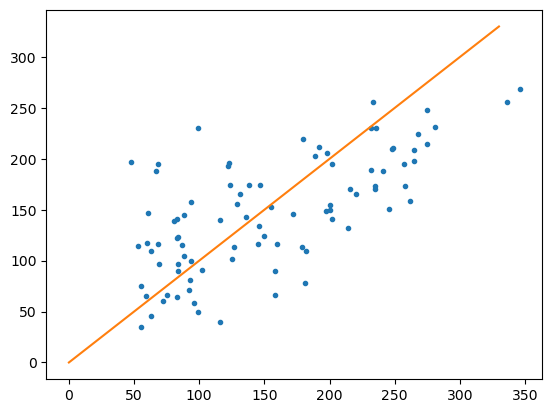

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_test, pred, '.')
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [ ]:
import pandas as pd

db_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
db_df

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(random_state=112)
rfc.fit(X_train, y_train)

rfc.feature_importances_

0.30021895699155327

In [25]:
X_train_bst = X_train[:, [2, 3, 8]]
X_test_bst = X_test[:, [2, 3, 8]]

In [26]:
lr.fit(X_train_bst, y_train)
pred = lr.predict(X_test_bst)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.41151093208041833
57.48355984732785
